In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Load dataset

data = sns.load_dataset('tips')

In [4]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
data['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [7]:
data['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [8]:
X = data.drop('total_bill', axis=1)
y = data['total_bill']

In [9]:
y

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
X_train

,tip,sex,smoker,day,time,size
57,1.50,Female,No,Sat,Dinner,2
67,1.00,Female,Yes,Sat,Dinner,1
113,2.55,Male,No,Sun,Dinner,2
106,4.06,Male,Yes,Sat,Dinner,2
125,4.20,Female,No,Thur,Lunch,6
...,...,...,...,...,...,...
179,3.55,Male,Yes,Sun,Dinner,2
82,1.83,Female,No,Thur,Lunch,1
172,5.15,Male,Yes,Sun,Dinner,2
10,1.71,Male,No,Sun,Dinner,2


In [12]:
day = pd.get_dummies(X_train['day'])
X_train.drop('day', axis=1, inplace = True)
X_train = pd.concat([X_train, day], axis=1)

X_train

,tip,sex,smoker,time,size,Thur,Fri,Sat,Sun
57,1.50,Female,No,Dinner,2,False,False,True,False
67,1.00,Female,Yes,Dinner,1,False,False,True,False
113,2.55,Male,No,Dinner,2,False,False,False,True
106,4.06,Male,Yes,Dinner,2,False,False,True,False
125,4.20,Female,No,Lunch,6,True,False,False,False
...,...,...,...,...,...,...,...,...,...
179,3.55,Male,Yes,Dinner,2,False,False,False,True
82,1.83,Female,No,Lunch,1,True,False,False,False
172,5.15,Male,Yes,Dinner,2,False,False,False,True
10,1.71,Male,No,Dinner,2,False,False,False,True


In [13]:
time = pd.get_dummies(X_train['time'])
X_train.drop('time', axis=1, inplace = True)
X_train = pd.concat([X_train, time], axis=1)

X_train

,tip,sex,smoker,size,Thur,Fri,Sat,Sun,Lunch,Dinner
57,1.50,Female,No,2,False,False,True,False,False,True
67,1.00,Female,Yes,1,False,False,True,False,False,True
113,2.55,Male,No,2,False,False,False,True,False,True
106,4.06,Male,Yes,2,False,False,True,False,False,True
125,4.20,Female,No,6,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
179,3.55,Male,Yes,2,False,False,False,True,False,True
82,1.83,Female,No,1,True,False,False,False,True,False
172,5.15,Male,Yes,2,False,False,False,True,False,True
10,1.71,Male,No,2,False,False,False,True,False,True


In [14]:
sex = pd.get_dummies(X_train['sex'])
X_train.drop('sex', axis=1, inplace = True)
X_train = pd.concat([X_train, sex], axis=1)

X_train

,tip,smoker,size,Thur,Fri,Sat,Sun,Lunch,Dinner,Male,Female
57,1.50,No,2,False,False,True,False,False,True,False,True
67,1.00,Yes,1,False,False,True,False,False,True,False,True
113,2.55,No,2,False,False,False,True,False,True,True,False
106,4.06,Yes,2,False,False,True,False,False,True,True,False
125,4.20,No,6,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
179,3.55,Yes,2,False,False,False,True,False,True,True,False
82,1.83,No,1,True,False,False,False,True,False,False,True
172,5.15,Yes,2,False,False,False,True,False,True,True,False
10,1.71,No,2,False,False,False,True,False,True,True,False


In [15]:
smoker = pd.get_dummies(X_train['smoker'])
X_train.drop('smoker', axis=1, inplace = True)
X_train = pd.concat([X_train, smoker], axis=1)

X_train

,tip,size,Thur,Fri,Sat,Sun,Lunch,Dinner,Male,Female,Yes,No
57,1.50,2,False,False,True,False,False,True,False,True,False,True
67,1.00,1,False,False,True,False,False,True,False,True,True,False
113,2.55,2,False,False,False,True,False,True,True,False,False,True
106,4.06,2,False,False,True,False,False,True,True,False,True,False
125,4.20,6,True,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
179,3.55,2,False,False,False,True,False,True,True,False,True,False
82,1.83,1,True,False,False,False,True,False,False,True,False,True
172,5.15,2,False,False,False,True,False,True,True,False,True,False
10,1.71,2,False,False,False,True,False,True,True,False,False,True


In [16]:
## Apply same preprocessing to X_test

# Day
day_test = pd.get_dummies(X_test['day'])
X_test = X_test.drop('day', axis=1)
X_test = pd.concat([X_test, day_test], axis=1)

# Time
time_test = pd.get_dummies(X_test['time'])
X_test = X_test.drop('time', axis=1)
X_test = pd.concat([X_test, time_test], axis=1)

# Sex
sex_test = pd.get_dummies(X_test['sex'])
X_test = X_test.drop('sex', axis=1)
X_test = pd.concat([X_test, sex_test], axis=1)

# Smoker
smoker_test = pd.get_dummies(X_test['smoker'])
X_test = X_test.drop('smoker', axis=1)
X_test = pd.concat([X_test, smoker_test], axis=1)

# Ensure columns match (in case of missing categories in test set)
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

# Reorder columns to match X_train
X_test = X_test[X_train.columns]

X_test.head()


,tip,size,Thur,Fri,Sat,Sun,Lunch,Dinner,Male,Female,Yes,No
238,4.67,3,False,False,True,False,False,True,False,True,False,True
173,3.18,2,False,False,False,True,False,True,True,False,True,False
175,3.11,2,False,False,False,True,False,True,True,False,True,False
29,3.00,2,False,False,True,False,False,True,False,True,False,True
76,3.08,2,False,False,True,False,False,True,True,False,True,False


In [17]:
## Import SVR

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [18]:
## Train SVR model with default parameters

svr_model = SVR()
svr_model.fit(X_train, y_train)


,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [19]:
## Make predictions

y_pred = svr_model.predict(X_test)


In [20]:
## Evaluate the model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.3f}")


Model Performance Metrics:
Mean Squared Error (MSE): 33.85
Root Mean Squared Error (RMSE): 5.82
Mean Absolute Error (MAE): 3.99
R² Score: 0.479


In [21]:
## Compare actual vs predicted values

comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

print("Sample Predictions:")
print(comparison_df.head(10))


Sample Predictions:
   Actual  Predicted
0   35.83  25.184305
1   31.85  18.350760
2   32.90  18.124032
3   19.65  16.925457
4   17.92  17.792581
5   24.59  24.332285
6   17.29  15.013193
7    8.77  13.989972
8   11.61  18.307810
9   27.28  20.746747


## Testing different kernels and hyperparameters


In [22]:
## Test different kernels

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

for kernel in kernels:
    svr = SVR(kernel=kernel, C=1.0)
    svr.fit(X_train, y_train)
    y_pred_kernel = svr.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred_kernel)
    r2 = r2_score(y_test, y_pred_kernel)
    
    results[kernel] = {
        'MSE': mse,
        'RMSE': np.sqrt(mse),
        'R²': r2
    }
    
    print(f"{kernel.upper()} Kernel - MSE: {mse:.2f}, RMSE: {np.sqrt(mse):.2f}, R²: {r2:.3f}")


LINEAR Kernel - MSE: 36.23, RMSE: 6.02, R²: 0.443
RBF Kernel - MSE: 33.85, RMSE: 5.82, R²: 0.479
POLY Kernel - MSE: 62.06, RMSE: 7.88, R²: 0.045
SIGMOID Kernel - MSE: 108.56, RMSE: 10.42, R²: -0.670


In [23]:
## Test different C values with RBF kernel

C_values = [0.1, 1, 10, 100, 1000]
print("Testing different C values with RBF kernel:\n")

for C in C_values:
    svr = SVR(kernel='rbf', C=C)
    svr.fit(X_train, y_train)
    y_pred_c = svr.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred_c)
    r2 = r2_score(y_test, y_pred_c)
    
    print(f"C={C}: MSE={mse:.2f}, RMSE={np.sqrt(mse):.2f}, R²={r2:.3f}")


Testing different C values with RBF kernel:

C=0.1: MSE=58.87, RMSE=7.67, R²=0.094
C=1: MSE=33.85, RMSE=5.82, R²=0.479
C=10: MSE=29.97, RMSE=5.47, R²=0.539
C=100: MSE=34.30, RMSE=5.86, R²=0.472
C=1000: MSE=52.45, RMSE=7.24, R²=0.193


In [24]:
## GridSearchCV for hyperparameter optimization

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': [0.01, 0.1, 0.5, 1.0]
}

opt_svr = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
opt_svr.fit(X_train, y_train)

print("Best parameters:", opt_svr.best_params_)
print("Best score (negative MSE):", opt_svr.best_score_)


Best parameters: {'C': 1, 'epsilon': 1.0, 'kernel': 'linear'}
Best score (negative MSE): -35.071511953553454


In [25]:
## Make predictions with optimized model

y_pred_opt = opt_svr.predict(X_test)

mse_opt = mean_squared_error(y_test, y_pred_opt)
rmse_opt = np.sqrt(mse_opt)
mae_opt = mean_absolute_error(y_test, y_pred_opt)
r2_opt = r2_score(y_test, y_pred_opt)

print("Optimized Model Performance:")
print(f"Mean Squared Error (MSE): {mse_opt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_opt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_opt:.2f}")
print(f"R² Score: {r2_opt:.3f}")


Optimized Model Performance:
Mean Squared Error (MSE): 36.73
Root Mean Squared Error (RMSE): 6.06
Mean Absolute Error (MAE): 4.38
R² Score: 0.435


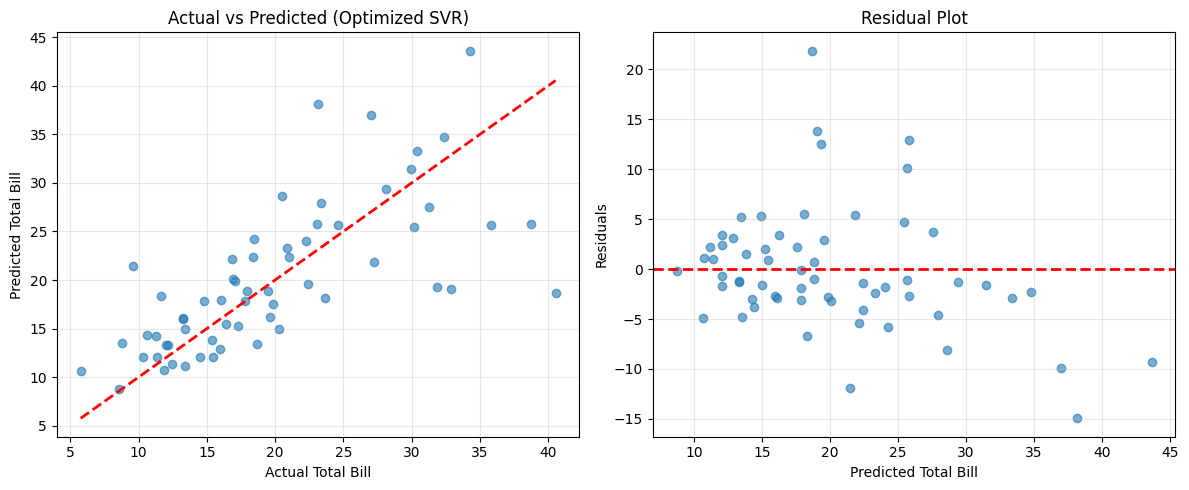

In [26]:
## Visualize predictions

plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_opt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total Bill')
plt.ylabel('Predicted Total Bill')
plt.title('Actual vs Predicted (Optimized SVR)')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_opt
plt.scatter(y_pred_opt, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Total Bill')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [27]:
## Make prediction on new data

# Example: Predict total bill for a new customer
# Features: tip, size, sex, smoker, day, time
new_customer = pd.DataFrame({
    'tip': [3.0],
    'size': [2],
    'sex': ['Male'],
    'smoker': ['No'],
    'day': ['Sat'],
    'time': ['Dinner']
})

# Preprocess the new customer data
new_day = pd.get_dummies(new_customer['day'])
new_customer = new_customer.drop('day', axis=1)
new_customer = pd.concat([new_customer, new_day], axis=1)

new_time = pd.get_dummies(new_customer['time'])
new_customer = new_customer.drop('time', axis=1)
new_customer = pd.concat([new_customer, new_time], axis=1)

new_sex = pd.get_dummies(new_customer['sex'])
new_customer = new_customer.drop('sex', axis=1)
new_customer = pd.concat([new_customer, new_sex], axis=1)

new_smoker = pd.get_dummies(new_customer['smoker'])
new_customer = new_customer.drop('smoker', axis=1)
new_customer = pd.concat([new_customer, new_smoker], axis=1)

# Ensure all columns match
for col in X_train.columns:
    if col not in new_customer.columns:
        new_customer[col] = 0

new_customer = new_customer[X_train.columns]

# Make prediction
predicted_bill = opt_svr.predict(new_customer)
print(f"Predicted Total Bill: ${predicted_bill[0]:.2f}")
print(f"\nCustomer Details:")
print(f"Tip: ${3.0:.2f}")
print(f"Party Size: 2")
print(f"Sex: Male")
print(f"Smoker: No")
print(f"Day: Saturday")
print(f"Time: Dinner")


Predicted Total Bill: $16.95

Customer Details:
Tip: $3.00
Party Size: 2
Sex: Male
Smoker: No
Day: Saturday
Time: Dinner
